<b>Universidad Galileo</b><br/>
<b>Maestría de Ciencia de Datos</b><br/>
<b>Statistical Learning I</b><br/>
<b>Jose Godoy</b><br/>
<b>Carnet 22000570</b><br/>
<b>15 de julio 2022</b><br/>

# 1. Cargando librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Cargando set de datos

In [2]:
xls = pd.ExcelFile('estaturas.xlsx')
normales = pd.read_excel(xls, 'normales')
valtest_normales = pd.read_excel(xls, 'valtest(normales)')
valtest_anomalias = pd.read_excel(xls, 'valtest(anomalias)')

Renombrando columnas

In [3]:
normales = pd.DataFrame({"altura": normales.iloc[:,0], "edad": normales.iloc[:,1]})
valtest_normales = pd.DataFrame({"altura": valtest_normales.iloc[:,0], "edad": valtest_normales.iloc[:,1]})
valtest_anomalias = pd.DataFrame({"altura": valtest_anomalias.iloc[:,0], "edad": valtest_anomalias.iloc[:,1]})

Normalización

In [4]:
altura_mean = normales.altura.mean(axis=0)
altura_std = normales.altura.std(axis=0)
edad_mean = normales.edad.mean(axis=0)
edad_std = normales.edad.std(axis=0)

In [5]:
normales_n = normales.copy()
normales_n.altura = (normales.altura-altura_mean)/altura_std
normales_n.edad = (normales.edad-edad_mean)/edad_std

valtest_normales_n = valtest_normales.copy()
valtest_normales_n.altura = (valtest_normales.altura-altura_mean)/altura_std
valtest_normales_n.edad = (valtest_normales.edad-edad_mean)/edad_std

valtest_anomalias_n = valtest_anomalias.copy()
valtest_anomalias_n.altura = (valtest_anomalias.altura-altura_mean)/altura_std
valtest_anomalias_n.edad = (valtest_anomalias.edad-edad_mean)/edad_std

# 3. Algoritmo K-Means

In [6]:
#Indices aleatorios
np.random.seed(2022)

In [7]:
#Algoritmo recursivo
def k_means(k_mean_param, k_mean_set, kparams, contador, ciclo):
    posicion_kparams = kparams.copy()
    longitud = len(k_mean_set)
    #Creando array de distancias y asignación de clusters
    distancias = np.full(longitud, -1.0)
    cluster = np.zeros(longitud)
    #Para cada registro
    for i in range(longitud):
        i_edad = k_mean_set.iloc[i,:].edad
        i_altura = k_mean_set.iloc[i,:].altura
        #Encontrando el centroide más cercano
        for j in range(k_mean_param):
            k_edad = kparams.iloc[j,:].edad
            k_altura = kparams.iloc[j,:].altura
            #Distancia
            distance_k = np.sqrt((k_edad - i_edad) ** 2 + (k_altura - i_altura) ** 2)
            if( distancias[i]==-1 or distancias[i]>distance_k):
                #Distancia más corta
                distancias[i] = distance_k
                cluster[i] = j
    #Reasignando posición de los clusters
    for j in range(k_mean_param):
        kparams.iloc[j,:].edad = k_mean_set["edad"][cluster == j].mean(axis=0)
        kparams.iloc[j,:].altura = k_mean_set["altura"][cluster == j].mean(axis=0)
    #Incrementar el contador si la posición de los clusters es la misma
    if( posicion_kparams.equals(kparams) ):
        contador=contador+1
    #Si la posición de los clusters es la misma dos veces consecutivamente
    if( contador >= 2):
        #Regresar parametros
        return (cluster, kparams, ciclo)
    else:
        #Repetir algoritmo
        return k_means(k_mean_param, k_mean_set, kparams, contador, ciclo + 1)

In [8]:
#Algoritmo kmeans
def k_means_algoritmo(k_mean_param, k_mean_set):
    #Calculando posición de clusters aleatoria
    longitud = len(k_mean_set)
    indices = np.random.choice(longitud, k_mean_param, replace=False)
    kparams = k_mean_set.iloc[indices,:].copy()
    return k_means(k_mean_param, k_mean_set, kparams, 0, 1)

## 3.1. Algoritmo K-Means - Experimento 1, k = 3

Ejecutando algoritmo K-means recursivo:

In [9]:
(cluster, kparams, ciclos) = k_means_algoritmo(3, normales_n)

In [10]:
print("El algoritmo se ejecutó",ciclos,"veces después de 2 iteraciones en el mismo lugar.")

El algoritmo se ejecutó 5 veces después de 2 iteraciones en el mismo lugar.


Clusters encontrados:

In [11]:
kparams.altura = (kparams.altura * altura_std) + altura_mean
kparams.edad = (kparams.edad * edad_std) + edad_mean
print(kparams.reset_index(drop=True))

     altura       edad
0  1.670769  30.692308
1  1.774000  25.450000
2  1.816000  42.800000


Tabla de edades y cluster asignado:

In [12]:
normales_kmeans = normales.copy()
normales_kmeans["cluster"] = cluster
normales_kmeans["cluster_altura"] = np.array(kparams.iloc[cluster,:].altura)
normales_kmeans["cluster_edad"] = np.array(kparams.iloc[cluster,:].edad)
normales_kmeans.head()

,altura,edad,cluster,cluster_altura,cluster_edad
0,1.77,26,1.0,1.774000,25.450000
1,1.74,31,0.0,1.670769,30.692308
2,1.72,24,1.0,1.774000,25.450000
3,1.78,34,1.0,1.774000,25.450000
4,1.65,32,0.0,1.670769,30.692308


Gráfica de puntos

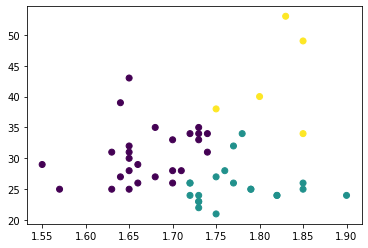

In [13]:
plt.scatter(normales_kmeans.altura, normales_kmeans.edad, alpha=1, c=normales_kmeans.cluster)

## 3.2. Algoritmo K-Means - Experimento 2, k = 4

Ejecutando algoritmo K-means recursivo:

In [14]:
(cluster2, kparams2, ciclos2) = k_means_algoritmo(4, normales_n)

In [15]:
print("El algoritmo se ejecutó",ciclos2,"veces después de 2 iteraciones en el mismo lugar.")

El algoritmo se ejecutó 6 veces después de 2 iteraciones en el mismo lugar.


Clusters encontrados:

In [16]:
kparams2.altura = (kparams2.altura * altura_std) + altura_mean
kparams2.edad = (kparams2.edad * edad_std) + edad_mean
print(kparams2.reset_index(drop=True))

     altura       edad
0  1.730667  25.533333
1  1.740000  37.733333
2  1.833750  25.875000
3  1.636154  28.076923


Tabla de edades y cluster asignado:

In [17]:
normales_kmeans2 = normales.copy()
normales_kmeans2["cluster"] = cluster2
normales_kmeans2["cluster_altura"] = np.array(kparams2.iloc[cluster2,:].altura)
normales_kmeans2["cluster_edad"] = np.array(kparams2.iloc[cluster2,:].edad)
normales_kmeans2.head()

,altura,edad,cluster,cluster_altura,cluster_edad
0,1.77,26,0.0,1.730667,25.533333
1,1.74,31,0.0,1.730667,25.533333
2,1.72,24,0.0,1.730667,25.533333
3,1.78,34,1.0,1.740000,37.733333
4,1.65,32,3.0,1.636154,28.076923


Gráfica de puntos

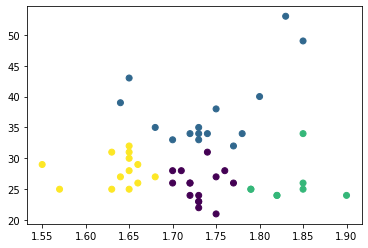

In [18]:
plt.scatter(normales_kmeans2.altura, normales_kmeans2.edad, alpha=1, c=normales_kmeans2.cluster)

## 3.3. Algoritmo K-Means - Experimento 3, k = 5

Ejecutando algoritmo K-means recursivo:

In [19]:
(cluster3, kparams3, ciclos3) = k_means_algoritmo(5, normales_n)

In [20]:
print("El algoritmo se ejecutó",ciclos3,"veces después de 2 iteraciones en el mismo lugar.")

El algoritmo se ejecutó 8 veces después de 2 iteraciones en el mismo lugar.


Clusters encontrados:

In [21]:
kparams3.altura = (kparams3.altura * altura_std) + altura_mean
kparams3.edad = (kparams3.edad * edad_std) + edad_mean
print(kparams3.reset_index(drop=True))

     altura       edad
0  1.731667  22.833333
1  1.730833  28.666667
2  1.741667  39.000000
3  1.636154  28.076923
4  1.833750  25.875000


Tabla de edades y cluster asignado:

In [22]:
normales_kmeans3 = normales.copy()
normales_kmeans3["cluster"] = cluster3
normales_kmeans3["cluster_altura"] = np.array(kparams3.iloc[cluster3,:].altura)
normales_kmeans3["cluster_edad"] = np.array(kparams3.iloc[cluster3,:].edad)
normales_kmeans3.head()

,altura,edad,cluster,cluster_altura,cluster_edad
0,1.77,26,1.0,1.730833,28.666667
1,1.74,31,1.0,1.730833,28.666667
2,1.72,24,0.0,1.731667,22.833333
3,1.78,34,2.0,1.741667,39.000000
4,1.65,32,3.0,1.636154,28.076923


Gráfica de puntos

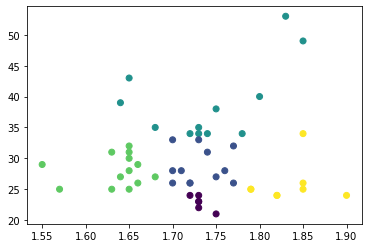

In [23]:
plt.scatter(normales_kmeans3.altura, normales_kmeans3.edad, alpha=1, c=normales_kmeans3.cluster)

## 3.4. Algoritmo K-Means - Experimento 4, k = 6

Ejecutando algoritmo K-means recursivo:

In [24]:
(cluster4, kparams4, ciclos4) = k_means_algoritmo(6, normales_n)

In [25]:
print("El algoritmo se ejecutó",ciclos4,"veces después de 2 iteraciones en el mismo lugar.")

El algoritmo se ejecutó 11 veces después de 2 iteraciones en el mismo lugar.


Clusters encontrados:

In [26]:
kparams4.altura = (kparams4.altura * altura_std) + altura_mean
kparams4.edad = (kparams4.edad * edad_std) + edad_mean
print(kparams4.reset_index(drop=True))

     altura       edad
0  1.650000  28.272727
1  1.730000  25.142857
2  1.826667  47.333333
3  1.560000  27.000000
4  1.833750  25.875000
5  1.720000  35.000000


Tabla de edades y cluster asignado:

In [27]:
normales_kmeans4 = normales.copy()
normales_kmeans4["cluster"] = cluster4
normales_kmeans4["cluster_altura"] = np.array(kparams4.iloc[cluster4,:].altura)
normales_kmeans4["cluster_edad"] = np.array(kparams4.iloc[cluster4,:].edad)
normales_kmeans4.head()

,altura,edad,cluster,cluster_altura,cluster_edad
0,1.77,26,1.0,1.73,25.142857
1,1.74,31,5.0,1.72,35.000000
2,1.72,24,1.0,1.73,25.142857
3,1.78,34,5.0,1.72,35.000000
4,1.65,32,0.0,1.65,28.272727


Gráfica de puntos

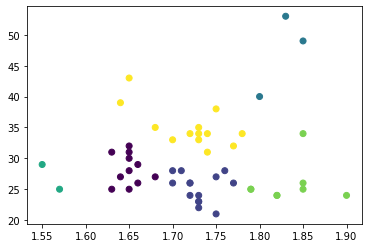

In [28]:
plt.scatter(normales_kmeans4.altura, normales_kmeans4.edad, alpha=1, c=normales_kmeans4.cluster)

## 3.5. Algoritmo K-Means - Experimento 5, k = 2

Ejecutando algoritmo K-means recursivo:

In [29]:
(cluster5, kparams5, ciclos5) = k_means_algoritmo(2, normales_n)

In [30]:
print("El algoritmo se ejecutó",ciclos5,"veces después de 2 iteraciones en el mismo lugar.")

El algoritmo se ejecutó 5 veces después de 2 iteraciones en el mismo lugar.


Clusters encontrados:

In [31]:
kparams5.altura = (kparams5.altura * altura_std) + altura_mean
kparams5.edad = (kparams5.edad * edad_std) + edad_mean
print(kparams5.reset_index(drop=True))

     altura       edad
0  1.718864  27.840909
1  1.767143  42.285714


Tabla de edades y cluster asignado:

In [32]:
normales_kmeans5 = normales.copy()
normales_kmeans5["cluster"] = cluster5
normales_kmeans5["cluster_altura"] = np.array(kparams5.iloc[cluster5,:].altura)
normales_kmeans5["cluster_edad"] = np.array(kparams5.iloc[cluster5,:].edad)
normales_kmeans5.head()

,altura,edad,cluster,cluster_altura,cluster_edad
0,1.77,26,0.0,1.718864,27.840909
1,1.74,31,0.0,1.718864,27.840909
2,1.72,24,0.0,1.718864,27.840909
3,1.78,34,0.0,1.718864,27.840909
4,1.65,32,0.0,1.718864,27.840909


Gráfica de puntos

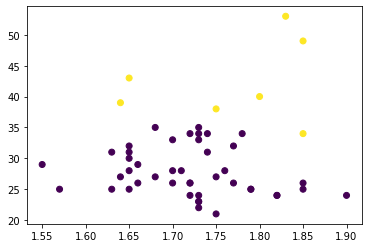

In [33]:
plt.scatter(normales_kmeans5.altura, normales_kmeans5.edad, alpha=1, c=normales_kmeans5.cluster)

# 4. Algoritmo GMM

Importando librería

In [34]:
from sklearn import mixture

## 4.1. Algoritmo GMM - Experimento 1, k = 3

Ejecutando algoritmo GMM:

In [35]:
model1 = mixture.GaussianMixture(n_components=3).fit(normales_n)
labels = model1.predict(normales_n)
probs = model1.predict_proba(normales_n)

Tabla de edades, cluster asignado y sus probabilidades:

In [36]:
normales_gmm1 = normales.copy()
normales_gmm1["cluster"] = labels
normales_gmm1["p(c0)"] = probs[:,0].round(2)
normales_gmm1["p(c1)"] = probs[:,1].round(2)
normales_gmm1["p(c2)"] = probs[:,2].round(2)
normales_gmm1.head()

,altura,edad,cluster,p(c0),p(c1),p(c2)
0,1.77,26,2,0.05,0.08,0.87
1,1.74,31,1,0.34,0.66,0.00
2,1.72,24,2,0.07,0.09,0.84
3,1.78,34,1,0.02,0.98,0.00
4,1.65,32,0,0.58,0.42,0.00


Gráfica de puntos

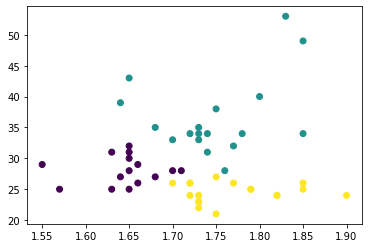

In [37]:
plt.scatter(normales_gmm1.altura, normales_gmm1.edad, alpha=1, c=normales_gmm1.cluster)

## 4.2. Algoritmo GMM - Experimento 2, k = 4

Ejecutando algoritmo GMM:

In [38]:
model2 = mixture.GaussianMixture(n_components=4).fit(normales_n)
labels = model2.predict(normales_n)
probs = model2.predict_proba(normales_n)

Tabla de edades, cluster asignado y sus probabilidades:

In [39]:
normales_gmm2 = normales.copy()
normales_gmm2["cluster"] = labels
normales_gmm2["p(c0)"] = probs[:,0].round(2)
normales_gmm2["p(c1)"] = probs[:,1].round(2)
normales_gmm2["p(c2)"] = probs[:,2].round(2)
normales_gmm2["p(c3)"] = probs[:,3].round(2)
normales_gmm2.head()

,altura,edad,cluster,p(c0),p(c1),p(c2),p(c3)
0,1.77,26,2,0.02,0.06,0.91,0.0
1,1.74,31,0,0.75,0.25,0.00,0.0
2,1.72,24,2,0.00,0.10,0.89,0.0
3,1.78,34,0,1.00,0.00,0.00,0.0
4,1.65,32,1,0.29,0.71,0.00,0.0


Gráfica de puntos

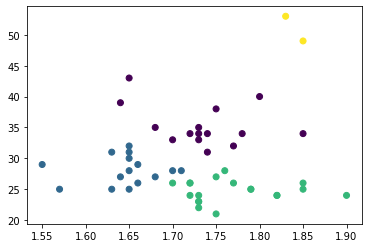

In [40]:
plt.scatter(normales_gmm2.altura, normales_gmm2.edad, alpha=1, c=normales_gmm2.cluster)

## 4.3. Algoritmo GMM - Experimento 3, k = 5

Ejecutando algoritmo GMM:

In [41]:
model3 = mixture.GaussianMixture(n_components=5).fit(normales_n)
labels = model3.predict(normales_n)
probs = model3.predict_proba(normales_n)

Tabla de edades, cluster asignado y sus probabilidades:

In [42]:
normales_gmm3 = normales.copy()
normales_gmm3["cluster"] = labels
normales_gmm3["p(c0)"] = probs[:,0].round(2)
normales_gmm3["p(c1)"] = probs[:,1].round(2)
normales_gmm3["p(c2)"] = probs[:,2].round(2)
normales_gmm3["p(c3)"] = probs[:,3].round(2)
normales_gmm3["p(c4)"] = probs[:,4].round(2)
normales_gmm3.head()

,altura,edad,cluster,p(c0),p(c1),p(c2),p(c3),p(c4)
0,1.77,26,3,0.04,0.00,0.0,0.94,0.02
1,1.74,31,0,0.85,0.00,0.0,0.00,0.15
2,1.72,24,1,0.00,0.97,0.0,0.00,0.02
3,1.78,34,0,1.00,0.00,0.0,0.00,0.00
4,1.65,32,4,0.35,0.00,0.0,0.00,0.65


Gráfica de puntos

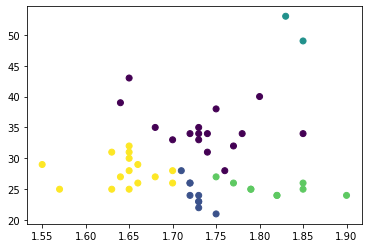

In [43]:
plt.scatter(normales_gmm3.altura, normales_gmm3.edad, alpha=1, c=normales_gmm3.cluster)

## 4.4. Algoritmo GMM - Experimento 4, k = 6

Ejecutando algoritmo GMM:

In [44]:
model4 = mixture.GaussianMixture(n_components=6).fit(normales_n)
labels = model4.predict(normales_n)
probs = model4.predict_proba(normales_n)

Tabla de edades, cluster asignado y sus probabilidades:

In [45]:
normales_gmm4 = normales.copy()
normales_gmm4["cluster"] = labels
normales_gmm4["p(c0)"] = probs[:,0].round(2)
normales_gmm4["p(c1)"] = probs[:,1].round(2)
normales_gmm4["p(c2)"] = probs[:,2].round(2)
normales_gmm4["p(c3)"] = probs[:,3].round(2)
normales_gmm4["p(c4)"] = probs[:,4].round(2)
normales_gmm4["p(c5)"] = probs[:,5].round(2)
normales_gmm4.head()

,altura,edad,cluster,p(c0),p(c1),p(c2),p(c3),p(c4),p(c5)
0,1.77,26,5,0.0,0.0,0.0,0.06,0.0,0.94
1,1.74,31,1,0.0,1.0,0.0,0.00,0.0,0.00
2,1.72,24,0,1.0,0.0,0.0,0.00,0.0,0.00
3,1.78,34,1,0.0,1.0,0.0,0.00,0.0,0.00
4,1.65,32,1,0.0,1.0,0.0,0.00,0.0,0.00


Gráfica de puntos

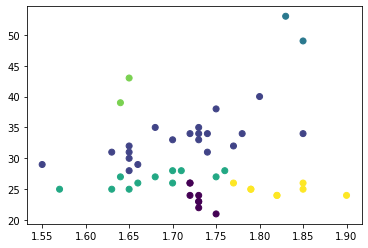

In [46]:
plt.scatter(normales_gmm4.altura, normales_gmm4.edad, alpha=1, c=normales_gmm4.cluster)

## 4.5. Algoritmo GMM - Experimento 5, k = 2

Ejecutando algoritmo GMM:

In [47]:
model5 = mixture.GaussianMixture(n_components=2).fit(normales_n)
labels = model5.predict(normales_n)
probs = model5.predict_proba(normales_n)

Tabla de edades, cluster asignado y sus probabilidades:

In [48]:
normales_gmm5 = normales.copy()
normales_gmm5["cluster"] = labels
normales_gmm5["p(c0)"] = probs[:,0].round(2)
normales_gmm5["p(c1)"] = probs[:,1].round(2)
normales_gmm5.head()

,altura,edad,cluster,p(c0),p(c1)
0,1.77,26,1,0.06,0.94
1,1.74,31,0,0.95,0.05
2,1.72,24,1,0.10,0.90
3,1.78,34,0,1.00,0.00
4,1.65,32,0,0.96,0.04


Gráfica de puntos

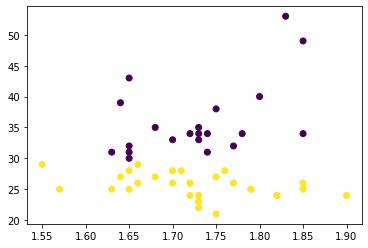

In [49]:
plt.scatter(normales_gmm5.altura, normales_gmm5.edad, alpha=1, c=normales_gmm5.cluster)

# 5. Método del codo - algoritmo K-Means

Algoritmo para calcular inercia y distorción

In [50]:
def metodo_codo(k):
    k_ = range(1, k+1)
    distortions = []
    inertias = []
    for k__ in k_:
        (cluster_codo, kparams_codo, ciclos_codo) = k_means_algoritmo(k__, normales_n)
        kparams_codo.altura = (kparams_codo.altura * altura_std) + altura_mean
        kparams_codo.edad = (kparams_codo.edad * edad_std) + edad_mean
        normales_kmeans_codo = normales.copy()
        normales_kmeans_codo["cluster"] = cluster_codo
        normales_kmeans_codo["cluster_altura"] = np.array(kparams_codo.iloc[cluster_codo,:].altura)
        normales_kmeans_codo["cluster_edad"] = np.array(kparams_codo.iloc[cluster_codo,:].edad)
        distance_k = np.sqrt(
            (normales_kmeans_codo.cluster_edad - normales_kmeans_codo.edad) ** 2 + 
            (normales_kmeans_codo.cluster_altura - normales_kmeans_codo.altura) ** 2
        )
        inertias.append(sum(distance_k))
        distortions.append(sum(distance_k)/len(distance_k))
    return (inertias, distortions)

Creando gráficas para estimar el valor K

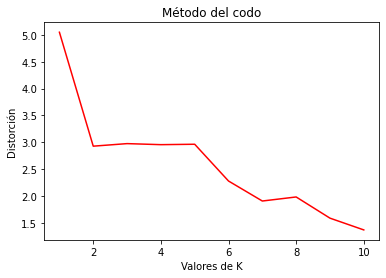

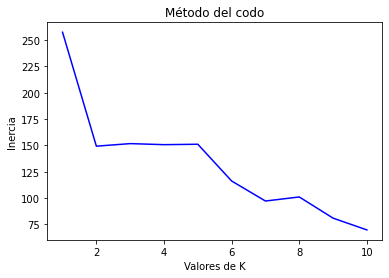

In [51]:
k = 10
(codo_inertias, codo_distortions) = metodo_codo(k)

plt.plot(range(1, k+1), codo_distortions, c='r')
plt.xlabel('Valores de K')
plt.ylabel('Distorción')
plt.title('Método del codo')
plt.show()


plt.plot(range(1, k+1), codo_inertias, c='b')
plt.xlabel('Valores de K')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()

## 5.1 Conclusión del método del codo

A partir de la gráfica se podría estimar que el valor ideal para este set de datos es k=2. Se se utiliza el método del codo para k=20 se ve que las gráficas varian de la misma forma, el único descenso se ve de k=1 a k=2. Esto se complementa con lo obtenido en los 5 experimentos.

# 6. Analizar el centroide de cada cluster y determinar si es posible asignar una categoría  cada cluster

Según los resultados de los algoritmos K-means y GMM si es posible, es posible crear dos clusters (k=2) pero el enfoque puede ser: (1) agrupar la altura según la edad, (2) agrupar la edad según la altura.

# 7. Análisis de datos valtest(normales)

## 7.1 Algoritmo K-means

Función para verificar a que cluster es más cercano:

In [52]:
#Algoritmo recursivo
def k_means_prediccion(cluster, datos):
    #Creando array de distancias y asignación de clusters
    distancias = np.full(len(datos), -1.0)
    cluster_cercano = np.zeros(len(datos))
    #Encontrando el cluster más cercano
    for i in range(0, len(datos)):
        for j in range(0, len(cluster)):
            distance_k = np.sqrt((datos.iloc[i,:].edad - cluster.iloc[j,:].edad) ** 2 + (datos.iloc[i,:].altura - cluster.iloc[j,:].altura) ** 2)
            if( distancias[i]==-1 or distancias[i]>distance_k):
                #Distancia más corta
                distancias[i] = distance_k
                cluster_cercano[i] = j
    return cluster_cercano

Predicción de algoritmo K-means:

In [53]:
cluster_prediccion = k_means_prediccion(kparams5, valtest_normales_n)

valtest_normales_prediccion = valtest_normales.copy()
valtest_normales_prediccion["cluster"] = cluster_prediccion
valtest_normales_prediccion["cluster_altura"] = np.array(kparams5.iloc[cluster_prediccion,:].altura)
valtest_normales_prediccion["cluster_edad"] = np.array(kparams5.iloc[cluster_prediccion,:].edad)
valtest_normales_prediccion

,altura,edad,cluster,cluster_altura,cluster_edad
0,1.82,25,0.0,1.718864,27.840909
1,1.80,27,0.0,1.718864,27.840909
2,1.60,31,0.0,1.718864,27.840909
3,1.60,35,0.0,1.718864,27.840909
4,1.82,30,0.0,1.718864,27.840909
5,1.76,32,0.0,1.718864,27.840909
6,1.79,31,0.0,1.718864,27.840909
7,1.61,31,0.0,1.718864,27.840909


Gráfica de puntos

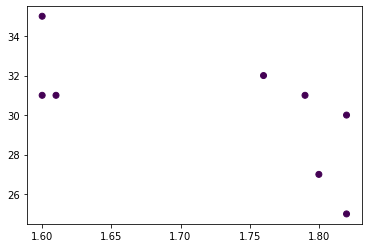

In [54]:
plt.scatter(valtest_normales_prediccion.altura, valtest_normales_prediccion.edad, alpha=1, c=valtest_normales_prediccion.cluster)

## 7.2 Algoritmo GMM

Ejecutando predicción de algoritmo GMM

In [55]:
labels = model5.predict(valtest_normales_n)
probs = model5.predict_proba(valtest_normales_n)

Tabla de edades, cluster asignado y sus probabilidades:

In [56]:
valtest_normales_gmm5 = valtest_normales.copy()
valtest_normales_gmm5["cluster"] = labels
valtest_normales_gmm5["p(c0)"] = probs[:,0].round(2)
valtest_normales_gmm5["p(c1)"] = probs[:,1].round(2)
valtest_normales_gmm5.head()

,altura,edad,cluster,p(c0),p(c1)
0,1.82,25,1,0.01,0.99
1,1.80,27,1,0.08,0.92
2,1.60,31,0,0.67,0.33
3,1.60,35,0,1.00,0.00
4,1.82,30,0,0.81,0.19


Gráfica de puntos

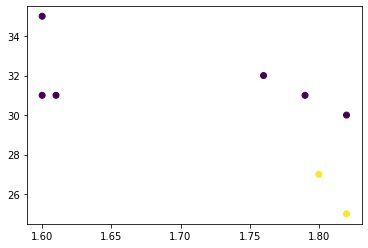

In [57]:
plt.scatter(valtest_normales_gmm5.altura, valtest_normales_gmm5.edad, alpha=1, c=valtest_normales_gmm5.cluster)

# 8. Estimación de Monte Carlo

Obtención de muestras aleatorias que siguen la distribución de probabilidad:

In [58]:
muestra,cluster = model5.sample(1000)
estimacion = pd.DataFrame({
    'altura': (muestra[:,0]* altura_std) + altura_mean,
    'edad': (muestra[:,1]* edad_std) + edad_mean,
    'cluster': cluster
})
estimacion.head()

,altura,edad,cluster
0,1.694205,31.138145,0
1,1.769530,41.607718,0
2,1.748008,29.983261,0
3,1.630065,33.720338,0
4,1.755381,37.572403,0


Función f

In [59]:
def f(edad, estatura):
  return estatura/edad

Calculando relación de estatura/edad promedio

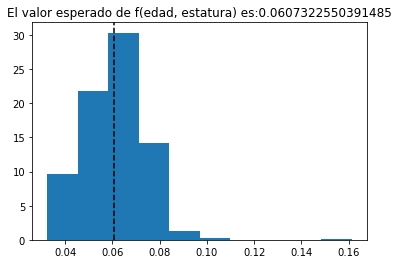

In [60]:
muestra_f = f(estimacion.edad, estimacion.altura)
valor_esperado_f = np.mean(muestra_f)
plt.hist(muestra_f, density=True)
plt.axvline(valor_esperado_f, color="k",linestyle="--")
plt.title("El valor esperado de f(edad, estatura) es:{}".format(valor_esperado_f))

plt.show()